### Carga de datos

In [2]:
import pandas as pd
import os
delitos = os.path.join('..', 'data', 'IDEFC_NM_jun23.csv')
delitos_df=pd.read_csv(delitos, encoding='ISO-8859-1')
edos = os.path.join('..', 'data', 'PoblacionEstado.csv')
edos_df=pd.read_csv(edos)

### Ajuste de tipos de datos y merge

In [3]:
edos_df['Población'] = edos_df['Población'].str.replace(',', '')
edos_df['Población'] = pd.to_numeric(edos_df['Población'], errors='coerce')

In [39]:
import geopandas as gpd
import os

# Ruta a la carpeta que contiene los datos georeferenciados
geo_path = os.path.join('..', 'data', 'mexico_edos', 'México_Estados.shp')

# Leer el archivo shapefile
mexico_shapefile = gpd.read_file(geo_path)

# Haciendo las sustituciones necesarias en los nombres de los estados
mexico_shapefile['ESTADO'] = mexico_shapefile['ESTADO'].replace({
    'Coahuila': 'Coahuila de Zaragoza',
    'Veracruz': 'Veracruz de Ignacio de la Llave',
    'Distrito Federal': 'Ciudad de México',
    'Michoacán': 'Michoacán de Ocampo'
})

mexico_shapefile


,CODIGO,ESTADO,geometry
0,MX02,Baja California,"MULTIPOLYGON (((-113.13972 29.01778, -113.2405..."
1,MX03,Baja California Sur,"MULTIPOLYGON (((-111.20612 25.80278, -111.2302..."
2,MX18,Nayarit,"MULTIPOLYGON (((-106.62108 21.56531, -106.6475..."
3,MX14,Jalisco,"POLYGON ((-101.52490 21.85664, -101.58830 21.7..."
4,MX01,Aguascalientes,"POLYGON ((-101.84620 22.01176, -101.96530 21.8..."
5,MX11,Guanajuato,"POLYGON ((-100.28030 20.20451, -100.34860 20.0..."
6,MX22,Querétaro,"POLYGON ((-100.12280 19.93804, -100.18250 20.0..."
7,MX13,Hidalgo,"POLYGON ((-98.65941 19.58540, -98.65556 19.595..."
8,MX16,Michoacán de Ocampo,"POLYGON ((-103.47960 18.96722, -103.34830 18.9..."
9,MX15,México,"POLYGON ((-98.62798 19.47576, -98.66612 19.405..."


In [21]:
# Agrupando delitos_df por "Entidad", "Año" y "Tipo de delito", sumando los valores mensuales
delitos_df = delitos_df.groupby(['Entidad', 'Año', 'Tipo de delito'])[months_columns].sum().reset_index()

# Mostrando las primeras filas del DataFrame agrupado
delitos_df.head()


,Entidad,Año,Tipo de delito,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,Aguascalientes,2015,Aborto,0,3,1,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
1,Aguascalientes,2015,Abuso de confianza,41,33,31,22,36,43,30.0,40.0,40.0,34.0,43.0,26.0
2,Aguascalientes,2015,Abuso sexual,6,4,0,2,1,1,1.0,1.0,0.0,0.0,1.0,1.0
3,Aguascalientes,2015,Acoso sexual,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aguascalientes,2015,Allanamiento de morada,13,11,18,16,16,19,18.0,19.0,15.0,11.0,4.0,9.0


In [45]:
merged_df = pd.merge(delitos_df, edos_df[['Entidad', 'Población']], on='Entidad', how='left')

months_columns = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

tasa_delitos_final_df = delitos_df[['Entidad', 'Tipo de delito', 'Año']].copy()

# Calculando la tasa de delitos por cada 100 mil habitantes para cada mes
for month in months_columns:
    tasa_delitos_final_df[f'Tasa_{month}'] = (merged_df[month] / merged_df['Población']) * 100000

# Resultado con la tasa de delitos por cada 100 mil habitantes para cada estado, tipo de delito, año y cada mes
tasa_delitos_final_df


,Entidad,Tipo de delito,Año,Tasa_Enero,Tasa_Febrero,Tasa_Marzo,Tasa_Abril,Tasa_Mayo,Tasa_Junio,Tasa_Julio,Tasa_Agosto,Tasa_Septiembre,Tasa_Octubre,Tasa_Noviembre,Tasa_Diciembre
0,Aguascalientes,Aborto,2015,0.000000,0.210437,0.070146,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070146,0.000000
1,Aguascalientes,Abuso de confianza,2015,2.875968,2.314803,2.174512,1.543202,2.525240,3.016259,2.104367,2.805822,2.805822,2.384949,3.016259,1.823785
2,Aguascalientes,Abuso sexual,2015,0.420873,0.280582,0.000000,0.140291,0.070146,0.070146,0.070146,0.070146,0.000000,0.000000,0.070146,0.070146
3,Aguascalientes,Acoso sexual,2015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Aguascalientes,Allanamiento de morada,2015,0.911892,0.771601,1.262620,1.122329,1.122329,1.332766,1.262620,1.332766,1.052183,0.771601,0.280582,0.631310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11515,Zacatecas,Tráfico de menores,2023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11516,Zacatecas,Violación equiparada,2023,0.801411,0.678117,0.678117,0.554823,0.801411,1.048000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11517,Zacatecas,Violación simple,2023,0.493176,0.801411,1.048000,0.924706,0.801411,1.048000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11518,Zacatecas,Violencia de género en todas sus modalidades d...,2023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [95]:
final_df = pd.merge(tasa_delitos_final_df, mexico_geo_df, left_on='Entidad', right_on='ESTADO', how='left')

### Filtro 

In [96]:
# Filtrando por delito y año específicos
delito_especifico = "Narcomenudeo"
año_especifico = 2023

filtered_df = final_df.query("`Tipo de delito` == @delito_especifico & `Año` == @año_especifico")
filtered_df


,Entidad,Tipo de delito,Año,Tasa_Enero,Tasa_Febrero,Tasa_Marzo,Tasa_Abril,Tasa_Mayo,Tasa_Junio,Tasa_Julio,Tasa_Agosto,Tasa_Septiembre,Tasa_Octubre,Tasa_Noviembre,Tasa_Diciembre,CODIGO,ESTADO,geometry
343,Aguascalientes,Narcomenudeo,2023,13.748530,14.590276,16.414061,12.415764,11.082998,9.329359,0.0,0.0,0.0,0.0,0.0,0.0,MX01,Aguascalientes,"POLYGON ((-101.84620 22.01176, -101.96530 21.8..."
703,Baja California,Narcomenudeo,2023,22.499217,21.437933,23.215584,19.899072,24.568721,23.268648,0.0,0.0,0.0,0.0,0.0,0.0,MX02,Baja California,"MULTIPOLYGON (((-113.13972 29.01778, -113.2405..."
1063,Baja California Sur,Narcomenudeo,2023,6.011670,5.761184,7.765074,5.886427,8.391290,8.767019,0.0,0.0,0.0,0.0,0.0,0.0,MX03,Baja California Sur,"MULTIPOLYGON (((-111.20612 25.80278, -111.2302..."
1423,Campeche,Narcomenudeo,2023,3.016062,2.154330,2.585196,2.154330,2.369763,2.692912,0.0,0.0,0.0,0.0,0.0,0.0,MX04,Campeche,"MULTIPOLYGON (((-91.83446 18.63805, -91.84195 ..."
1783,Chiapas,Narcomenudeo,2023,0.956018,0.721523,0.793675,0.649371,0.721523,0.450952,0.0,0.0,0.0,0.0,0.0,0.0,MX05,Chiapas,"POLYGON ((-91.43750 17.24111, -91.35278 17.176..."
2143,Chihuahua,Narcomenudeo,2023,7.028573,6.200110,6.975124,6.333733,7.188921,6.360458,0.0,0.0,0.0,0.0,0.0,0.0,MX06,Chihuahua,"POLYGON ((-108.47130 26.96133, -108.60420 27.0..."
2503,Ciudad de México,Narcomenudeo,2023,4.267127,4.234553,4.505999,3.963108,5.363768,3.897961,0.0,0.0,0.0,0.0,0.0,0.0,MX09,Ciudad de México,"POLYGON ((-99.28487 19.14244, -99.34056 19.357..."
2863,Coahuila de Zaragoza,Narcomenudeo,2023,29.681219,27.202488,34.988247,22.912376,16.270647,23.833956,0.0,0.0,0.0,0.0,0.0,0.0,MX07,Coahuila de Zaragoza,"POLYGON ((-103.29015 28.99773, -103.28035 28.9..."
3223,Colima,Narcomenudeo,2023,28.985864,31.720379,28.438961,28.712412,23.653559,25.977897,0.0,0.0,0.0,0.0,0.0,0.0,MX08,Colima,"POLYGON ((-103.74548 18.68807, -104.00446 18.8..."
3583,Durango,Narcomenudeo,2023,4.037869,4.419829,4.365263,3.001119,4.037869,4.583527,0.0,0.0,0.0,0.0,0.0,0.0,MX10,Durango,"POLYGON ((-104.31140 22.31921, -104.34500 22.4..."


### Gráfica

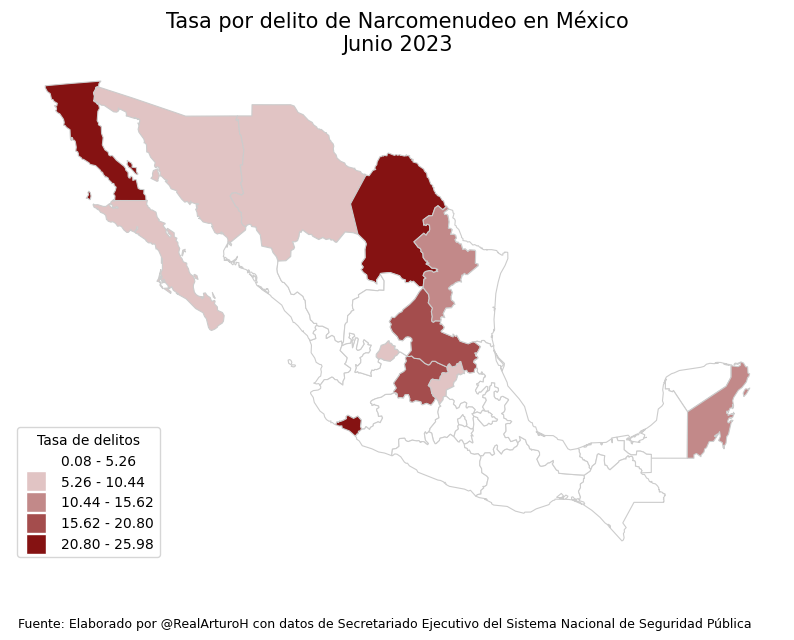

In [101]:
merged_map_data = mexico_shapefile.merge(filtered_df, left_on='ESTADO', right_on='Entidad', how='left')
merged_map_data_geo = gpd.GeoDataFrame(merged_map_data, geometry='geometry_y')

import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt

def plot_map_geo(merged_map_data, mes):
    # Obteniendo los datos para el mes seleccionado
    data = merged_map_data[f'Tasa_{mes}']

    # Creando 5 bins usando np.histogram_bin_edges
    bins = np.histogram_bin_edges(data, bins=5)

    # Asignando una categoría basada en los bins
    merged_map_data[f'bins_{mes}'] = np.digitize(data, bins) - 1

    # Creando una paleta de colores con degradado desde blanco hasta rojo
    cmap = LinearSegmentedColormap.from_list('custom', ['white', '#851212'], N=5)

    fig, ax = plt.subplots(figsize=(10, 8), facecolor='white')
    merged_map_data.plot(column=f'bins_{mes}', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)

    # Quitando los ejes y el recuadro
    ax.axis('off')
    ax.set_frame_on(False)

    # Creando una leyenda con cuadrados de colores y rangos automáticos
    legend_elements = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=cmap(i/4), markersize=15) for i in range(5)]
    labels = [f"{bins[i]:.2f} - {bins[i + 1]:.2f}" for i in range(5)]
    plt.legend(legend_elements, labels, title="Tasa de delitos", loc='lower left')

    plt.title(f"Tasa por delito de {delito_especifico} en México\n{mes} {año_especifico}", fontsize=15)
    plt.figtext(0.5, 0.1, 'Fuente: Elaborado por @RealArturoH con datos de Secretariado Ejecutivo del Sistema Nacional de Seguridad Pública', ha='center', fontsize=9)

    plt.show()

# Llamada a la función con el mes deseado
plot_map_geo(merged_map_data_geo, mes='Junio')
